# Introduction

Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Boston, MA.

## Content

The following Airbnb activity is included in this Boston dataset:

1. Listings : Including full descriptions and average review score
2. Reviews  : Including unique id for each reviewer and detailed comments
3. Calendar : Including listing id and the price and availability for that day


The data is obtained from [Kaggle](https://www.kaggle.com/airbnb/boston)


The question I try to answer in this notebook include:
  ```sh
   > What are the features that highly correlate to price? 
   > How price and rating relate with each other?
   > What’s the major factor that influence price and ratings?
  ````

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
calendar = pd.read_csv('C://Users//divyam07//Desktop//udacity//Write_a_Data_Science_Blog_Post//AirBnB Boston data//calendar.csv')
listings = pd.read_csv('C://Users//divyam07//Desktop//udacity//Write_a_Data_Science_Blog_Post//AirBnB Boston data//listings.csv')
reviews = pd.read_csv('C://Users//divyam07//Desktop//udacity//Write_a_Data_Science_Blog_Post//AirBnB Boston data//reviews.csv')

In [3]:
calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [4]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [5]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [6]:
def basic_info(data):
    
    """
    Provides a information of the dataset
    Input  - Give the dataset name
    Output - Give the matrix, missing value in percentage 
    """
    
    print('Shape: {}'.format(data.shape))
    print((data.isnull().sum()[data.isnull().sum()>0]/data.shape[0])*100)

In [7]:
basic_info(calendar)

Shape: (1308890, 4)
price    50.871578
dtype: float64


In [8]:
basic_info(listings)

Shape: (3585, 95)
summary                           3.988842
space                            29.483961
neighborhood_overview            39.470014
notes                            55.090656
transit                          35.983264
access                           41.534170
interaction                      43.347280
house_rules                      33.249651
thumbnail_url                    16.708508
medium_url                       16.708508
xl_picture_url                   16.708508
host_location                     0.306834
host_about                       36.513250
host_response_time               13.138075
host_response_rate               13.138075
host_acceptance_rate             13.138075
host_neighbourhood                9.456067
neighbourhood                    15.146444
neighbourhood_group_cleansed    100.000000
city                              0.055788
zipcode                           1.059972
market                            0.390516
property_type                     0.

In [9]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

## cleaning

### To get more about missing values.

In [10]:
def missing_values(data):
    """
    Input - dataset name
    Output - missing values colounm name wise with the help of heatmap
    """
    
    sns.heatmap(data.isnull(), cbar = False,yticklabels = False)

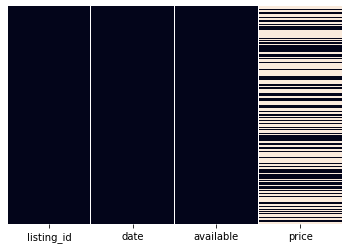

In [11]:
 missing_values(calendar)

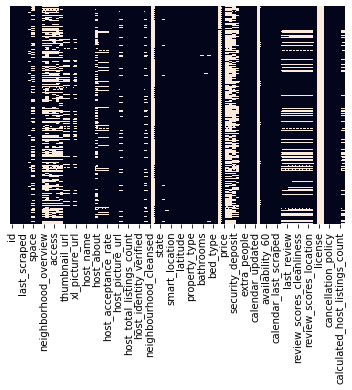

In [12]:
 missing_values(listings)

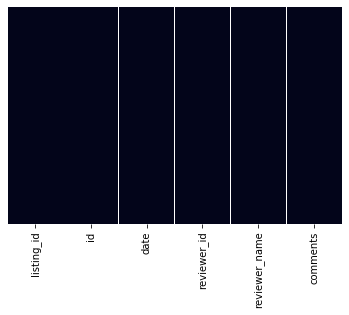

In [13]:
 missing_values(reviews)

In [14]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

In [15]:
# Firstly remove the doller sign 
def remove_sign(x,sign):
    if type(x) is str:
        x = float(x.replace(sign,'').replace(',',''))
    return x


listings.price = listings.price.apply(remove_sign,sign='$')
listings.host_response_rate = listings.host_response_rate.apply(remove_sign,sign='%')
listings.host_acceptance_rate = listings.host_acceptance_rate.apply(remove_sign,sign='%')

### sepearting categorical and numeric variable and filling the missing value

In [16]:
#firstly make acopy
df_listing = listings.copy()

In [17]:
# catogarical variable
cat_listings = df_listing.select_dtypes(include=['object'])

cat_listing = df_listing[['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'street', 'neighbourhood',
       'neighbourhood_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'amenities', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people',
       'calendar_updated', 'calendar_last_scraped', 'first_review',
       'last_review', 'requires_license', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification']]
# drop the missing value
df_cat_dropna = cat_listing.dropna(axis=0)
# Mode function
fill_mode = lambda col: col.fillna(col.mode())
# Fill the mode
cat_listing = df_cat_dropna.apply(fill_mode, axis=0)

In [18]:
# numerucal variable

num_listings = df_listing.select_dtypes(include=['int', 'float'])
# some columns are empty, so better to remove them 
num_listings.isnull().sum().sort_values(ascending=False)
# removing the empty coloumns
num_listings = num_listings.drop(['neighbourhood_group_cleansed','license','jurisdiction_names','has_availability','square_feet'],axis=1)

#filling with mean in missing values
# Mean function
fill_mean = lambda col: col.fillna(col.mean())
# Fill the mean
num_listing = num_listings.apply(fill_mean, axis=0)

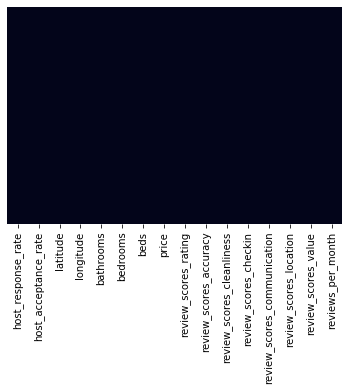

In [19]:
# again check for missing value 
# for numerical variables
sns.heatmap(num_listing.isnull(),cbar = False,yticklabels = False)

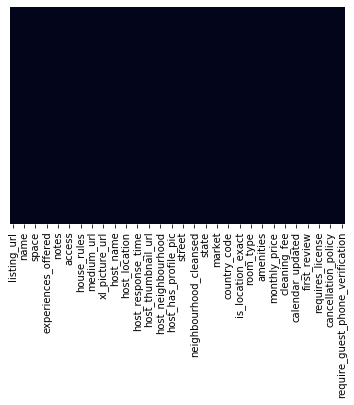

In [20]:
# for catagorical variable
sns.heatmap(cat_listing.isnull(),cbar = False,yticklabels = False)

## Q1.  What are the features that highly correlate to price?

In [21]:
# find the correlation 
corr = num_listing.corr()
corr

,host_response_rate,host_acceptance_rate,latitude,longitude,bathrooms,bedrooms,beds,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
host_response_rate,1.000000,0.004924,0.048616,0.039927,0.018682,-0.006737,0.025668,-0.005680,0.057586,0.042445,0.057097,0.049215,0.065477,0.022162,0.034109,0.118070
host_acceptance_rate,0.004924,1.000000,-0.102264,-0.044967,-0.093178,-0.083833,-0.020034,-0.115013,0.024783,0.058682,0.006069,0.066573,0.084871,-0.072339,0.078731,0.296394
latitude,0.048616,-0.102264,1.000000,0.319327,-0.020697,-0.045465,-0.012366,0.196270,-0.013057,-0.036194,0.001459,-0.066937,-0.047685,0.206171,-0.035047,0.044858
longitude,0.039927,-0.044967,0.319327,1.000000,0.010155,0.015719,0.033721,0.165621,0.015650,0.003072,0.042924,-0.008283,-0.006645,0.033957,-0.000884,0.097826
bathrooms,0.018682,-0.093178,-0.020697,0.010155,1.000000,0.430588,0.347531,0.248003,0.001809,-0.015345,0.023083,-0.046998,-0.040078,-0.024924,-0.010979,-0.040668
bedrooms,-0.006737,-0.083833,-0.045465,0.015719,0.430588,1.000000,0.710190,0.385227,0.049475,0.021534,0.066721,0.010100,0.015151,-0.041163,0.020772,-0.054535
beds,0.025668,-0.020034,-0.012366,0.033721,0.347531,0.710190,1.000000,0.369777,0.030977,0.008724,0.058051,-0.001552,0.008718,-0.013102,-0.001116,-0.000912
price,-0.005680,-0.115013,0.196270,0.165621,0.248003,0.385227,0.369777,1.000000,0.070753,0.027566,0.098087,-0.002577,0.002419,0.129765,0.007918,-0.106502
review_scores_rating,0.057586,0.024783,-0.013057,0.015650,0.001809,0.049475,0.030977,0.070753,1.000000,0.703920,0.753547,0.583298,0.599477,0.458117,0.783622,0.076564
review_scores_accuracy,0.042445,0.058682,-0.036194,0.003072,-0.015345,0.021534,0.008724,0.027566,0.703920,1.000000,0.643256,0.468073,0.492628,0.325119,0.664397,0.109473


In [22]:
# using heatmap to undersatnd better

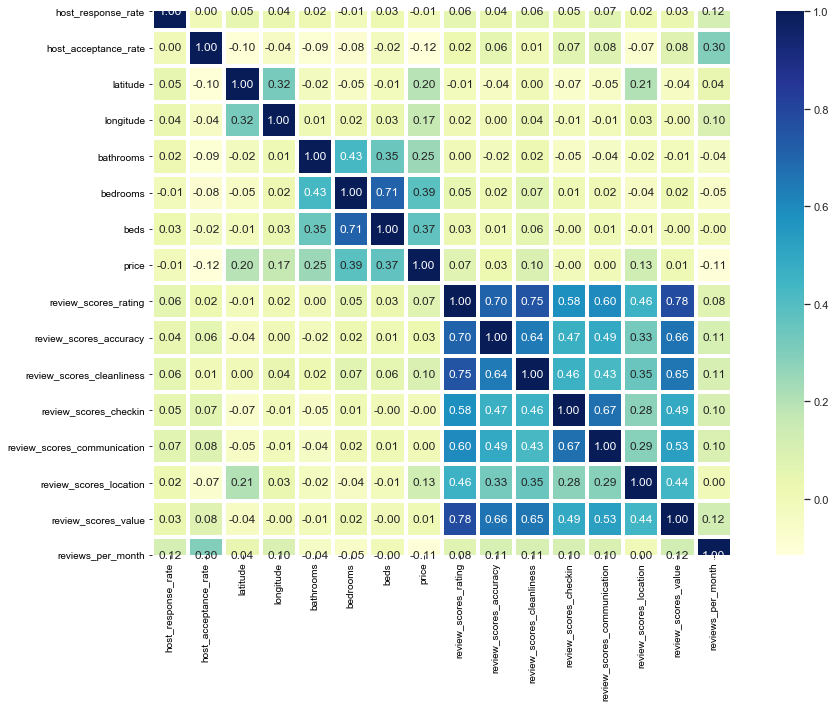

In [23]:
fig, ax = plt.subplots(figsize=(16,10))
sns.set(font_scale=1)
correlation=sns.heatmap(corr, cbar = True, annot=True, square = True, fmt = '.2f',linewidths=3,cmap="YlGnBu")

The features that highly correlate with price are:
1. Bedrooms
2. Beds
3. Accomodates 
4. Room Type
5. number of bedrooms
6. number of guests

some catagorical variable are selected on the basic of visualization which are below present

##  Q2 How price and rating relate with each other?

In [24]:
# use 25% price value as low price bar; 75% price value as high price bar
def price_level(x,low_bar=85,high_bar=220):
    if x<=low_bar:
        x='Low_Price'
    elif x>=high_bar:
        x='High_Price'
    else:
        x='Medium_Price'
    return x
listings['price_level'] = listings.price.apply(price_level)

In [25]:
# select price and ratings and dropna
price_rate = listings[["id","price","review_scores_rating","number_of_reviews","price_level"]].dropna()
price_rate.head()

,id,price,review_scores_rating,number_of_reviews,price_level
1,3075044,65.0,94.0,36,Low_Price
2,6976,65.0,98.0,41,Low_Price
3,1436513,75.0,100.0,1,Low_Price
4,7651065,79.0,99.0,29,Low_Price
5,12386020,75.0,100.0,8,Low_Price


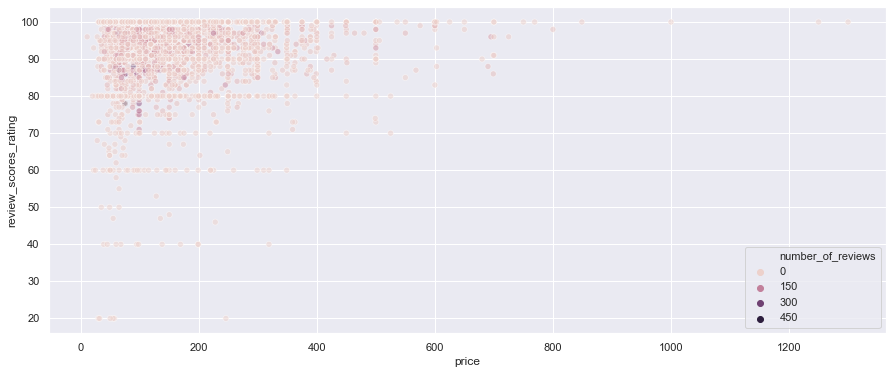

In [34]:
f, ax = plt.subplots(figsize=(15, 6))
sns.scatterplot(x='price',y='review_scores_rating',hue='number_of_reviews',alpha=0.5,data=price_rate)

Insights

1. low ratings are associate with lower prices.
2. however high rating dose not mean high price.

## Q3  What’s the major factor that influence price and ratings?

In [35]:
# keep listings with not null prices
listings_price = listings[listings.price.notnull()]


In [36]:
def plot_price_by_cat(column_name,listings=listings,fig_row_size=11,fig_col_size=9):
    price_col = listings_price.groupby(column_name).mean()[['price']]
    price_col.reset_index(inplace=True)
    f, ax = plt.subplots(figsize=(fig_row_size, fig_col_size))
    sns.barplot(x=column_name,y='price',palette="Blues_d",data=price_col.sort_values(by='price', ascending=False))

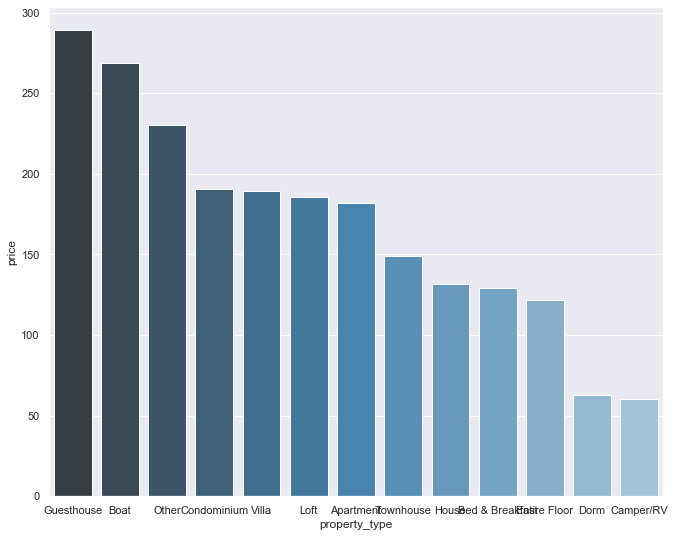

In [37]:
plot_price_by_cat('property_type',listings=listings_price)

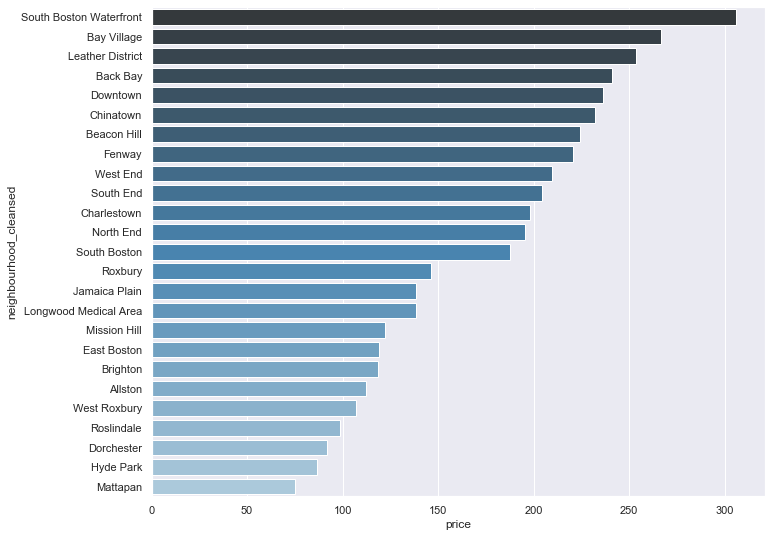

In [51]:
def plot_price_by_cata(column_name,listings=listings,fig_row_size=11,fig_col_size=9):
    price_col = listings_price.groupby(column_name).mean()[['price']]
    price_col.reset_index(inplace=True)
    f, ax = plt.subplots(figsize=(fig_row_size, fig_col_size))
    sns.barplot(y=column_name,x='price',palette="Blues_d",data=price_col.sort_values(by='price', ascending=False))
plot_price_by_cata('neighbourhood_cleansed',listings=listings_price)    

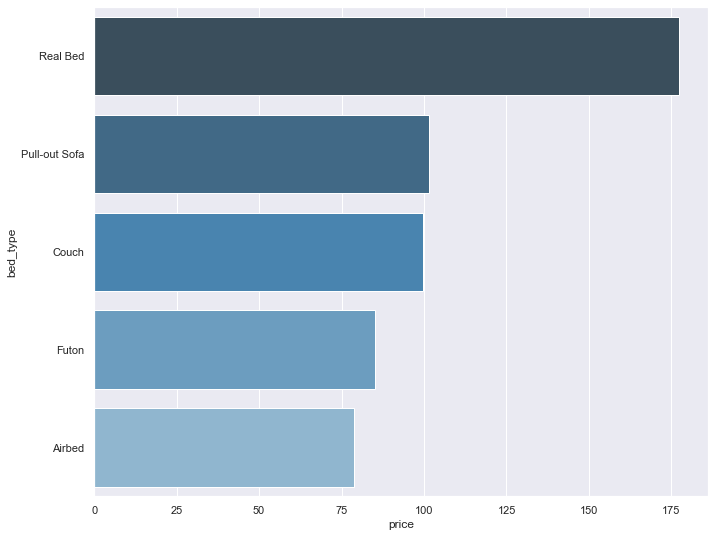

In [53]:
plot_price_by_cata('bed_type',listings=listings_price)

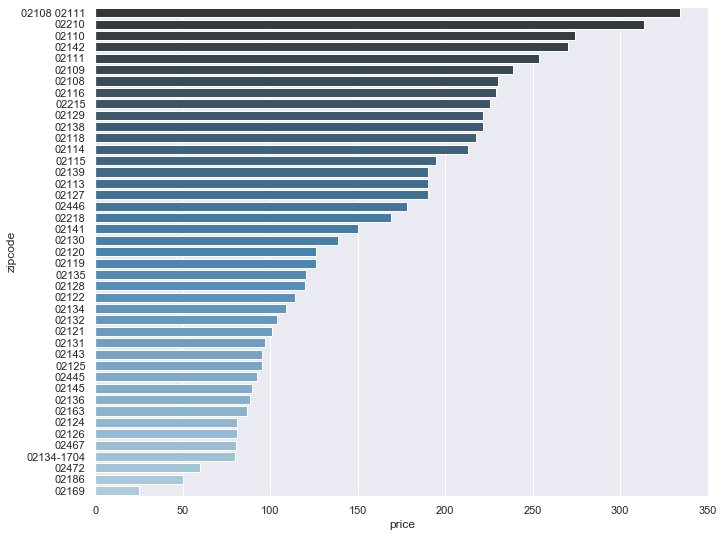

In [52]:
plot_price_by_cata('zipcode',listings=listings_price)

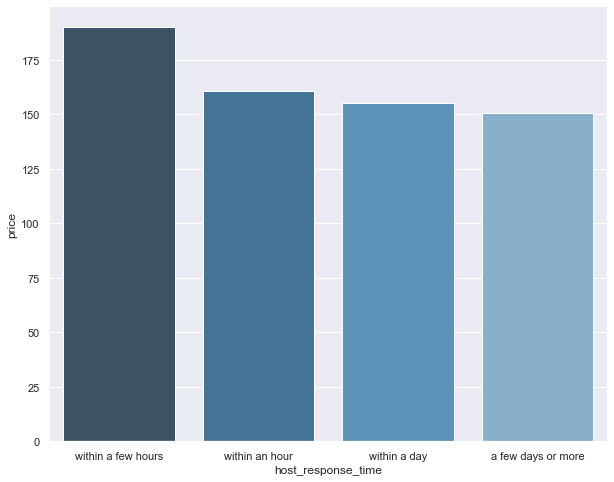

In [45]:
plot_price_by_cat('host_response_time',listings=listings_price,fig_row_size=10,fig_col_size=8)

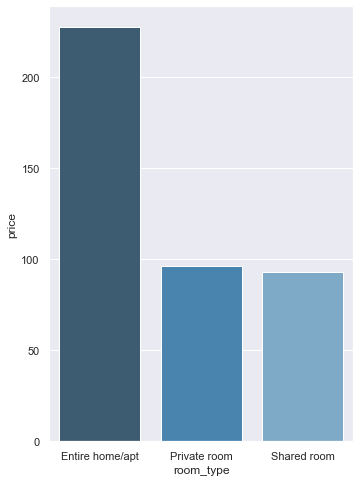

In [56]:
fig = plt.figure(figsize=(12, 8))
ax2 = fig.add_subplot(122)
# price and bed_type
price_room_type = listings_price.groupby('room_type').mean()[['price']]
price_room_type.reset_index(inplace=True)
sns.barplot(x='room_type',y='price',palette="Blues_d",data=price_room_type.sort_values(by='price', ascending=False),ax=ax2)

Insights

The factor that influence price are 
 1. property_type : Ghesthouse
 2. room_type : Entire Home/Apt
 3. bed_type : Real Bed
 4. host_response_time : within a few hours
 5. zipcode :  02111
 6. neighbourhood_cleansed : South Boston waterfront 